In [1]:
import matplotlib
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os, sys
sys.path.append('..')
from field import *

In [4]:
# Run
parent_path = '../../../' # How many folders do you have to go back before you are out of the P: drive?

# mass spectra
path_ACSM = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/Org_data/'
path_PAH = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/PAH/'

ACSM_labels = ['org', 'm105', 'm183', 'm202', 'm216', 'm226', 'm228', 'm252']
ACSM = read_ACMS_txt(path_ACSM, parent_path, ACSM_labels)
display(ACSM['m105'].keys())

# PAH = read_data(path_PAH, parent_path, 'Time')
# display(PAH.keys())

Index(['Time', 'Greve 28062023', 'Indiakaj 13072022', 'Indiakaj 14072022',
       'Vesterbrogade 12062023', 'Vesterbrogade 13062023'],
      dtype='object')

In [5]:
# Black carbon
path_BC_vesterbrogade = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Vesterbro_asphalt 2023/'
BC_station_vesterbrogade = ['MA200-0353']
path_BC_indiakaj = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Indiakaj_asphalt 2022/'
BC_station_indiakaj = ['S0052', 'S0055']
path_BC_greve = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Greve_asphalt_2023/'
BC_station_greve = ['S0089']

BC_vesterbrogade = read_csv_BC(path_BC_vesterbrogade, parent_path, BC_station_vesterbrogade)
BC_indiakaj = read_csv_BC(path_BC_indiakaj, parent_path, BC_station_indiakaj)
BC_greve = read_csv_BC(path_BC_greve, parent_path, BC_station_greve)

full_BC = BC_indiakaj.copy()
full_BC.update(BC_vesterbrogade)
full_BC.update(BC_greve)

print('Vesterbrogade: ', BC_vesterbrogade.keys())
print('Indiakaj: ', BC_indiakaj.keys())
print('Greve: ', BC_greve.keys())

print(full_BC.keys())

Vesterbrogade:  dict_keys(['230612094700', '230613075200'])
Indiakaj:  dict_keys(['220713081200', '220814063001'])
Greve:  dict_keys(['230628065100'])
dict_keys(['220713081200', '220814063001', '230612094700', '230613075200', '230628065100'])


In [3]:
timestamps_PAH = np.array([['08:00:1', '08:15:', '08:55:', '09:05:', '09:06:1', '09:13:', '10:00:', '10:15:1'],    # Greve
                           ['09:17:1', '09:47:1', '10:40:', '10:47:1', '11:05:1', '11:08:', '11:15:1', '11:30:'],    # Indiakaj d. 13
                           ['07:40:0', '07:55:', '08:35:', '08:43:', '08:44:0', '08:55:', '09:15:', '09:30:0'],    # Indiakaj d. 14
                           ['11:30:', '12:00:', '12:43:1', '12:45:1', '12:47:1', '13:00:', '13:20:', '13:33:1'],    # Vesterbrogade d. 12
                           ['11:05:0', '11:30:', '11:55:0', '12:00:', '12:10:', '12:20:', '12:40:', '12:55:1']])   # Vesterbrogade d. 13 

In [7]:
org_df = ACSM['org'].sort_values(by = 'Time')
org_df.reset_index()

full_conc_mean = np.zeros(len(org_df.keys()[1:]))
traffic_before_mean = np.zeros(len(org_df.keys()[1:]))
asphalt_peak_mean = np.zeros(len(org_df.keys()[1:]))
after_AP_mean = np.zeros(len(org_df.keys()[1:]))
traffic_after_mean = np.zeros(len(org_df.keys()[1:]))

for i, key in enumerate(org_df.keys()[1:]):
    mask = org_df[key] != 0
    idx = []
    for j, time in enumerate(org_df['Time'][mask]):
        for t in timestamps_PAH[i]:
            if t in str(time):
                idx.append(j)
    
    full = org_df[key][mask].dropna()
    tb = org_df[key][mask][idx[0]:idx[1]+1].dropna()
    AP = org_df[key][mask][idx[2]:idx[3]+1].dropna()
    after_AP = org_df[key][mask][idx[4]:idx[5]+1].dropna()
    ta = org_df[key][mask][idx[6]:idx[7]+1].dropna()

    full_conc_mean[i] = np.sum(full) / len(full)
    traffic_before_mean[i] = np.sum(tb) / len(tb)
    asphalt_peak_mean[i] = np.sum(AP) / len(AP)
    after_AP_mean[i] = np.sum(after_AP) / len(after_AP)
    traffic_after_mean[i] = np.sum(ta) / len(ta)

print('Full mean')
print(full_conc_mean)
print('Traffic before mean')
print(traffic_before_mean)
print('Asphalt peak mean')
print(asphalt_peak_mean)
print('After AP mean')
print(after_AP_mean)
print('Traffic after mean')
print(traffic_after_mean)

Full mean
[2.79222591 3.13249242 0.52051822 3.57084499 4.6089789 ]
Traffic before mean
[0.90774048 2.98774802 0.13335524 2.51709208 2.51029545]
Asphalt peak mean
[30.49497268 10.48661829  2.12352377 25.7649995  72.03089147]
After AP mean
[ 2.16529839  5.86521705  1.33753452  7.51050709 12.71025953]
Traffic after mean
[1.05245139 2.4112402  0.3547342  2.87141388 2.82192988]


c:\Users\B363580\Documents\GitHub\NFA_project\field.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 8)
c:\Users\B363580\Documents\GitHub\NFA_project\field.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), size = 8)


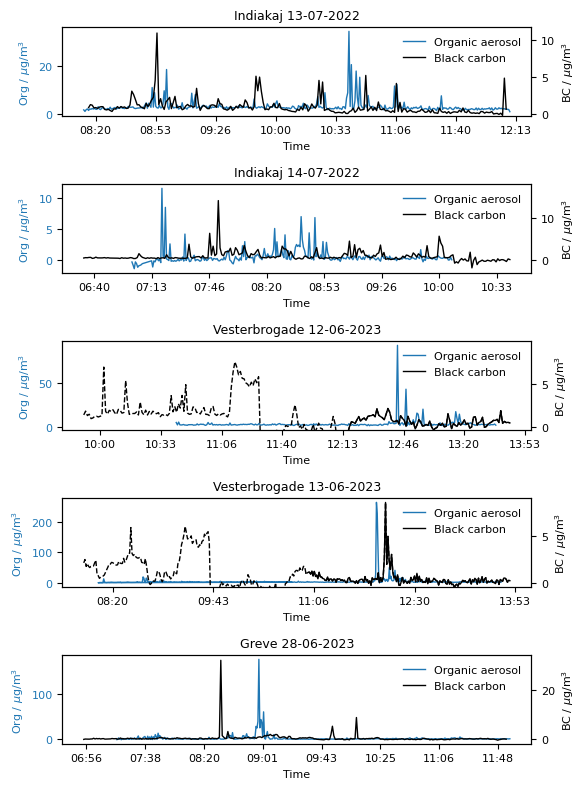

In [6]:
BC_120623_mask = BC_vesterbrogade['230612094700']['Time'].index >= 148
BC_130623_mask = BC_vesterbrogade['230613075200']['Time'].index >= 188

fig, ax = plt.subplots(5, 1, figsize = (6, 8))

plot_ACSM_BC(ax[0], ACSM['org'][400:], BC_indiakaj['220713081200'], 'Indiakaj 13072022', None, 60)
ax[0].set_title('Indiakaj 13-07-2022', fontsize = 9)
plot_ACSM_BC(ax[1], ACSM['org'][760:], BC_indiakaj['220814063001'], 'Indiakaj 14072022', None, 5)
ax[1].set_title('Indiakaj 14-07-2022', fontsize = 9)
plot_ACSM_BC(ax[2], ACSM['org'], BC_vesterbrogade['230612094700'], 'Vesterbrogade 12062023', BC_120623_mask, 25)
ax[2].set_title('Vesterbrogade 12-06-2023', fontsize = 9)
plot_ACSM_BC(ax[3], ACSM['org'], BC_vesterbrogade['230613075200'][:-2], 'Vesterbrogade 13062023', BC_130623_mask[:-2], 22.5)
ax[3].set_title('Vesterbrogade 13-06-2023', fontsize = 9)
plot_ACSM_BC(ax[4], ACSM['org'], BC_greve['230628065100'][:300], 'Greve 28062023', None, 19)
ax[4].set_title('Greve 28-06-2023', fontsize = 9)

fig.tight_layout()
fig.savefig('Field_data/ACSM_BC.png', dpi = 600)
plt.show()

c:\Users\B363580\Documents\GitHub\NFA_project\field.py:306: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size = 8)
c:\Users\B363580\Documents\GitHub\NFA_project\field.py:308: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), size = 8)


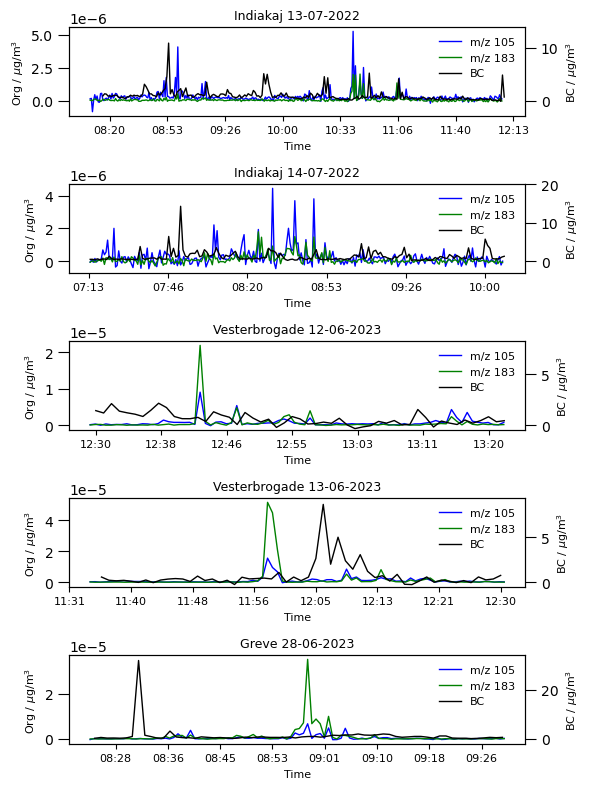

In [7]:
acsm_keys = ['Indiakaj 13072022', 'Indiakaj 14072022', 'Vesterbrogade 12062023', 'Vesterbrogade 13062023', 'Greve 28062023']
n = [4, 5, 5, 18, 17]
peak_int = [[0, -1, 0, 260],
            [0, 261, 40, 215],
            [230, 310, 159, 212],
            [265, 350, 220, 275],
            [100, 200, 90, 156]]

fig, ax = plt.subplots(5, 1, figsize = (6, 8))

plot_105_183(ax, ACSM, acsm_keys, full_BC, n, peak_int)
ax[0].set_title('Indiakaj 13-07-2022', fontsize = 9)
ax[1].set_title('Indiakaj 14-07-2022', fontsize = 9)
ax[2].set_title('Vesterbrogade 12-06-2023', fontsize = 9)
ax[3].set_title('Vesterbrogade 13-06-2023', fontsize = 9)
ax[4].set_title('Greve 28-06-2023', fontsize = 9)


fig.tight_layout()
fig.savefig('Field_data/ACSM_105_183.png', dpi = 600)

In [3]:
PAH_labels = ['Total PAH', 'm/z = 202', 'm/z = 216', 'm/z = 226', 'm/z = 228',
              'm/z = 240', 'm/z = 242', 'm/z = 250', 'm/z = 252', 'm/z = 264', 
              'm/z = 266', 'm/z = 276', 'm/z = 288', 'm/z = 290', 'm/z = 300', 'm/z = 302']

PAH_colors = ['tab:blue', 'tab:orange', 'tab:green', 'red', 'tab:purple', 'tab:brown', 
              'tab:pink', 'magenta', 'tab:olive', 'tab:cyan', 'navy', 'orangered', 'darkolivegreen',
              'darkred', 'darkmagenta', 'chocolate']

In [20]:
peak_int = [[0, -1, 224, 242],
            [0, -1, 85, 185],
            [0, -1, 167, 172],
            [0, -1, 297, 310],
            [0, -1, 145, 166]]

PAH_keys = ['Indiakaj 130722', 'Indiakaj 140722', 'Vesterbrogade 120623', 'Vesterbrogade 130623', 'Greve 280623']

fig, ax = plt.subplots(5, 2, figsize = (6, 7.5))

plot_PAH_ACSM(ax, PAH, PAH_keys, PAH_colors, peak_int)

fig.tight_layout()
fig.savefig('Field_data/ACSM_PAH.png', dpi = 600)

<IPython.core.display.Javascript object>

In [23]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_ACSM_BC(ax[0], ACSM['org'], BC_vesterbrogade['230612094700'], 'Vesterbrogade 12062023', 25)
plot_ACSM_BC(ax[1], ACSM['org'], BC_vesterbrogade['230613075200'][:-2], 'Vesterbrogade 13062023', 22.5)

fig.tight_layout()
fig.savefig('Field_data/vesterbrogade_ACSM_BC.png', dpi = 600)
plt.show()

<IPython.core.display.Javascript object>

In [24]:
total_PAH = 0

for key in PAH['Vesterbrogade 120623'].keys()[2:]:
    max_conc = max(PAH['Vesterbrogade 120623'][key]) * 1.5
    total_PAH += max_conc

print(total_PAH)

0.91513397805


In [25]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], ACSM, 'Vesterbrogade 12062023', ACSM_labels, 2)
plot_overview(ax[1], ACSM, 'Vesterbrogade 13062023', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Vesterbrogade_ACSM.png', dpi = 600)

<IPython.core.display.Javascript object>

In [7]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_PAH_ACSM_wInset(ax[0], PAH['Vesterbrogade 120623'], 1, PAH_colors, 2, (0.07, 0, 1, 1), 1, [167, 172])
ax[0].legend(labels = PAH_labels, frameon = False, fontsize = 8, ncol = 5, bbox_to_anchor = (1.05, 1.4))
plot_PAH_ACSM_wInset(ax[1], PAH['Vesterbrogade 130623'], 1, PAH_colors, 2, (0.07, 0, 1, 1), 1, [297, 310])

fig.tight_layout()
fig.savefig('Field_data/Vesterbrogade_ACSM_PAH.png', dpi = 600)

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\B363580\AppData\Local\Temp\ipykernel_8124\1326847129.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [28]:
fig, ax = plt.subplots(2,1, figsize = (6, 6))

plot_ACSM_BC(ax[0], ACSM['org'], BC_indiakaj['220713081200'], 'Indiakaj 13072022', 1.3)
plot_ACSM_BC(ax[1], ACSM['org'], BC_indiakaj['220814063001'], 'Indiakaj 14072022', 1.2)

fig.tight_layout()
fig.savefig('Field_data/indiakaj_ACSM_BC.png', dpi = 600)
plt.show()

<IPython.core.display.Javascript object>

In [29]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], ACSM, 'Indiakaj 13072022', ACSM_labels, 2)
plot_overview(ax[1], ACSM, 'Indiakaj 14072022', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Indiakaj_ACSM.png', dpi = 600)

<IPython.core.display.Javascript object>

In [30]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_PAH_ACSM_wInset(ax[0], PAH['Indiakaj 130722'], 1, PAH_colors, 2, (0.32, 0., 0.65, 1), 0.9, [224, 242])
ax[0].legend(labels = PAH_labels, frameon = False, fontsize = 8, ncol = 5, bbox_to_anchor = (1.05, 1.4))
plot_PAH_ACSM_wInset(ax[1], PAH['Indiakaj 140722'], 1, PAH_colors, 2, (0.65, 0, 0.8, 1), 1, [85, 185])

fig.tight_layout()
fig.savefig('Field_data/Indiakaj_ACSM_PAH.png', dpi = 600)

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\B363580\AppData\Local\Temp\ipykernel_14984\1179958634.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [31]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_ACSM_BC(ax, ACSM['org'], BC_greve['230628065100'][:300], 'Greve 28062023', 19)

fig.tight_layout()
fig.savefig('Field_data/greve_ACSM_BC.png', dpi = 600)
plt.show()

<IPython.core.display.Javascript object>

In [32]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_overview(ax, ACSM, 'Greve 28062023', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Greve_ACSM.png', dpi = 600)

<IPython.core.display.Javascript object>

In [33]:
fig, ax = plt.subplots(figsize = (6, 3.2))

plot_PAH_ACSM_wInset(ax, PAH['Greve 280623'], 1, PAH_colors, 2, (0.5, 0, 1.1, 1), 1, [145, 166])
ax.legend(labels = PAH_labels[:7], frameon = False, fontsize = 8, ncol = 4, bbox_to_anchor = (1., 1.2))

fig.tight_layout()
fig.savefig('Field_data/Greve_ACSM_PAH.png', dpi = 600)

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\B363580\AppData\Local\Temp\ipykernel_14984\1928811856.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
